In [191]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns #For heatmap
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from preprocessing.preprocess_data import DataSet, make_categorical, ReLU, pred_to_delivery, remap
import catboost as cb

%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [192]:
data_collection = DataSet()

In [193]:
y = data_collection.Y_train


<Axes: title={'center': 'Train/Test  C'}, xlabel='time'>

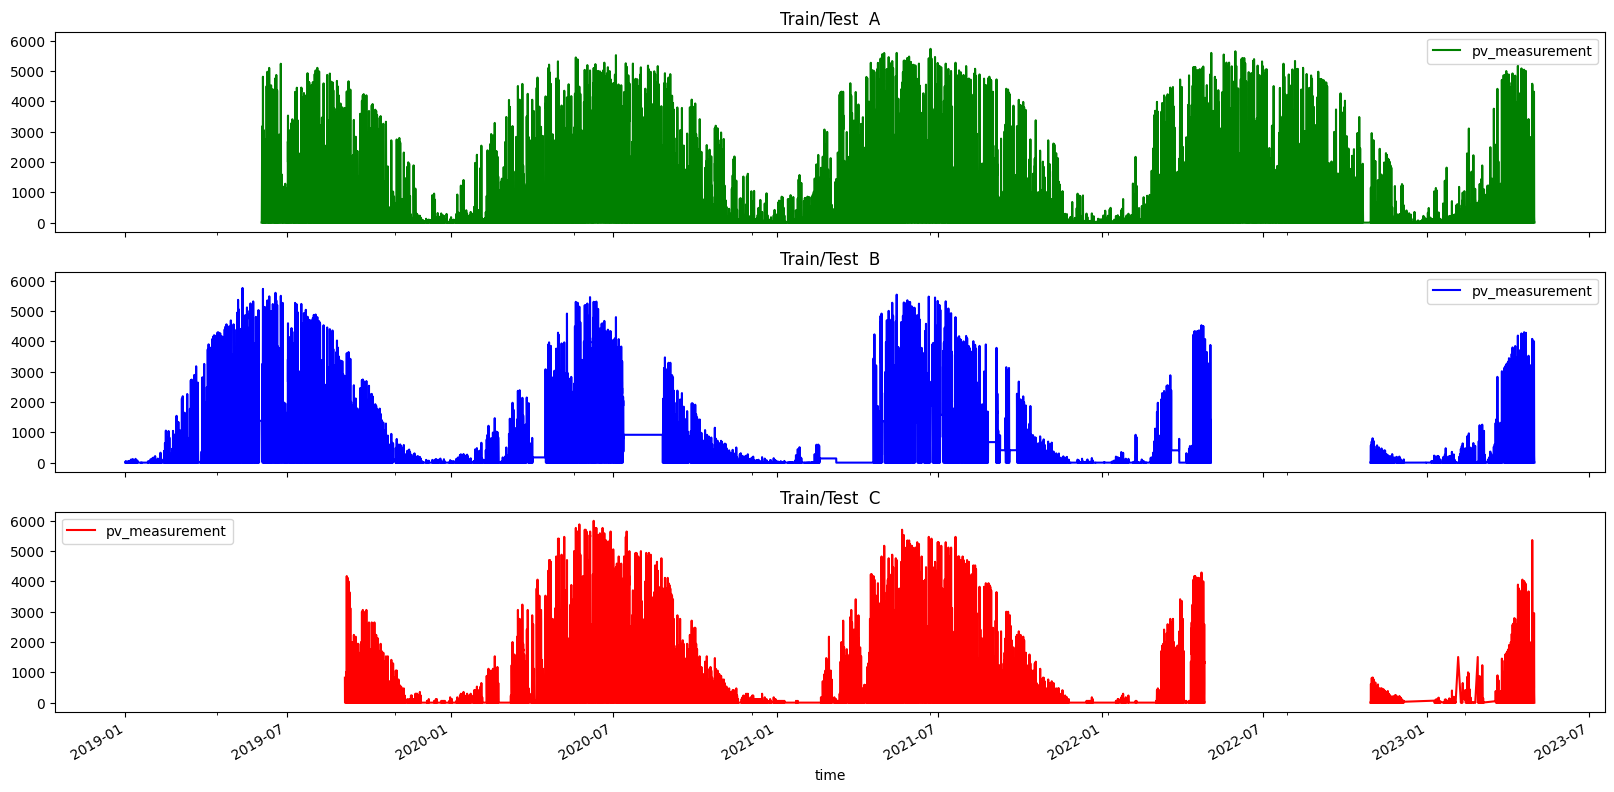

In [206]:
# test = y['a']

fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True, sharey = True)
y['a'].set_index('time').plot(ax=axs[0], title='Train/Test  A', color='Green')
y['b'].set_index('time').plot(ax=axs[1], title='Train/Test  B', color='Blue')
y['c'].set_index('time').plot(ax=axs[2], title='Train/Test  C', color='Red')




In [205]:
y['a'].max(),y['b'].max(), y['c'].max()

(time              2023-04-30 23:00:00
 pv_measurement                5733.42
 dtype: object,
 time              2023-04-30 23:00:00
 pv_measurement                 5761.5
 dtype: object,
 time              2023-04-30 23:00:00
 pv_measurement                 5997.6
 dtype: object)

In [196]:
Y_b = y['b']
Y_c = y['c']

# quite good with 5 and 6
Y_b['pv_measurement'] = y['b']['pv_measurement']*5
Y_c['pv_measurement'] = y['c']['pv_measurement']*6


<Axes: title={'center': 'Train/Test  C'}, xlabel='time'>

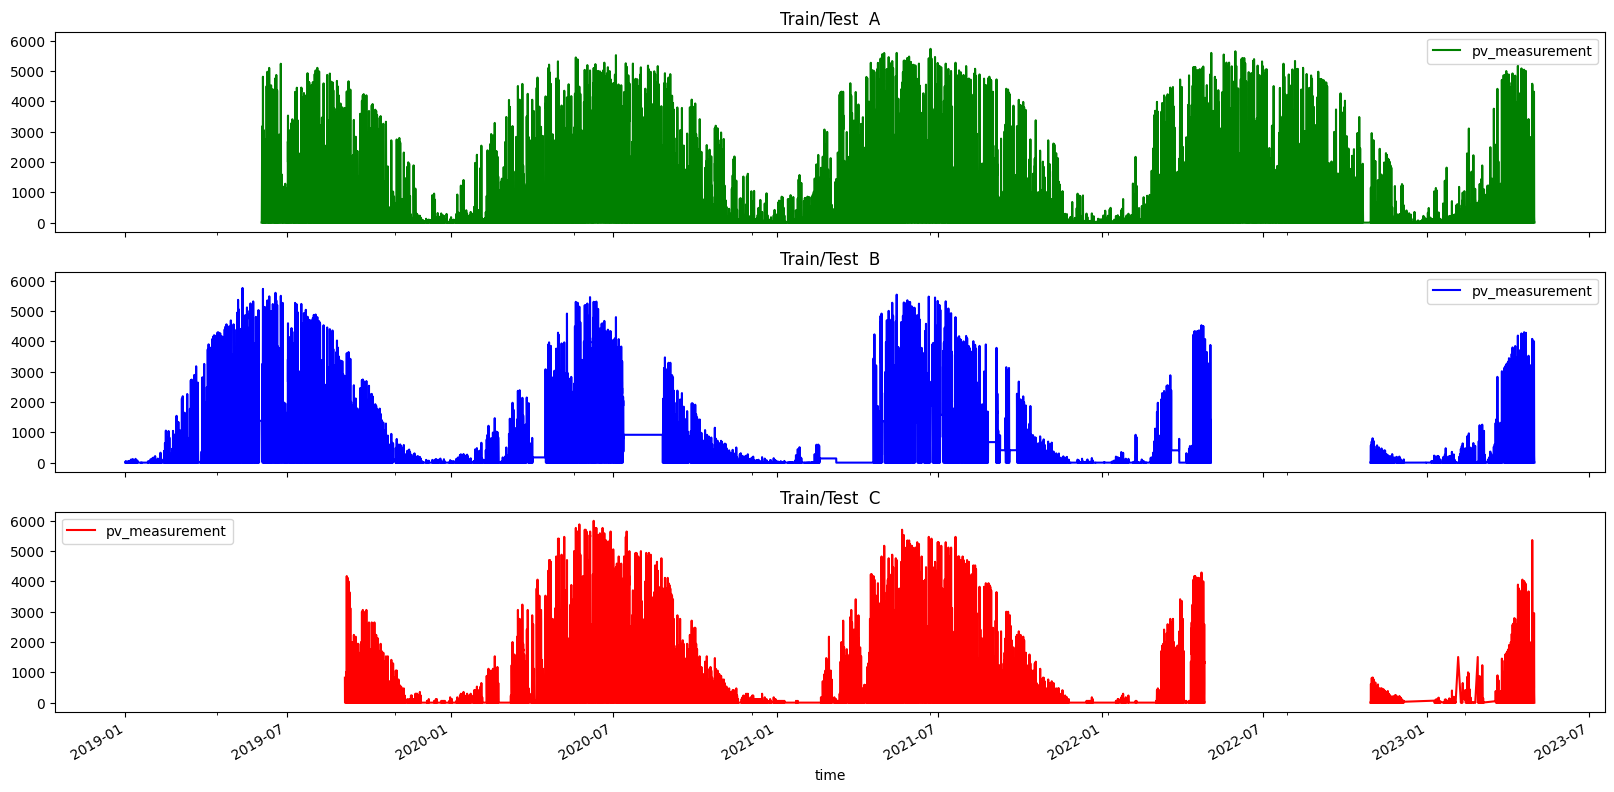

In [197]:
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True, sharey = True)
y['a'].set_index('time').plot(ax=axs[0], title='Train/Test  A', color='Green')
y['b'].set_index('time').plot(ax=axs[1], title='Train/Test  B', color='Blue')
y['c'].set_index('time').plot(ax=axs[2], title='Train/Test  C', color='Red')



<Axes: xlabel='time'>

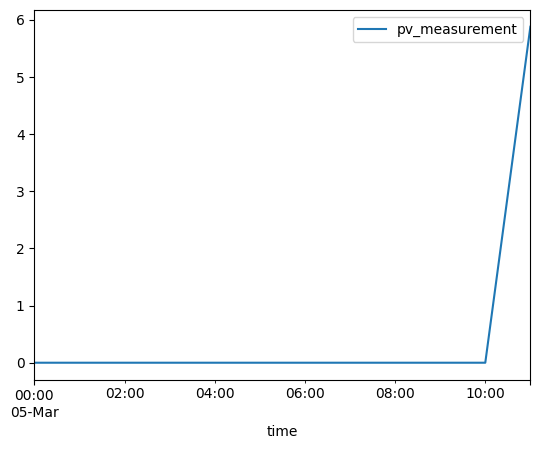

In [198]:
y['c'].set_index('time').loc['2023-03-05':'2023-03-17'].plot()

<Axes: xlabel='time'>

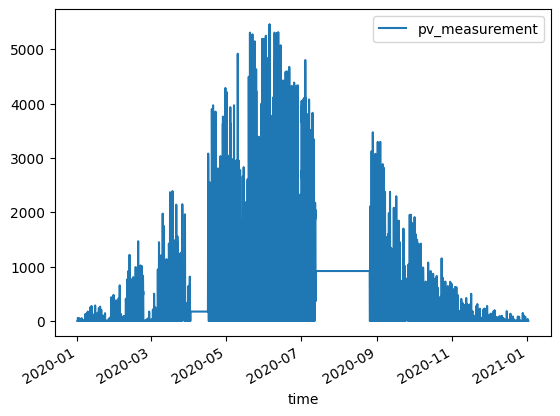

In [199]:
y['b'].set_index('time').loc['2020-01-01':'2021-01-01'].plot()


<Axes: xlabel='time'>

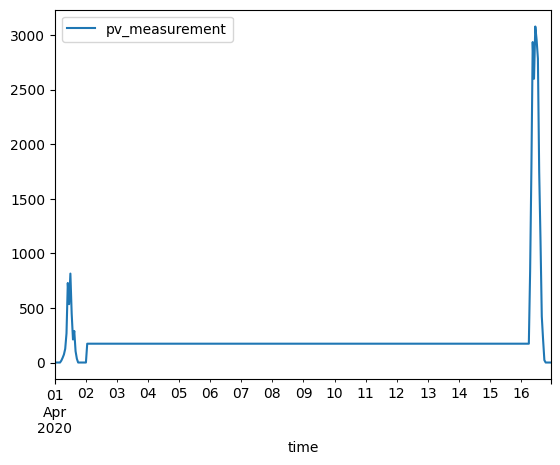

In [200]:
#Sucks in '2020-04-02':'2020-04-15'
y['b'].set_index('time').loc['2020-04-01':'2020-04-16'].plot()


<Axes: xlabel='time'>

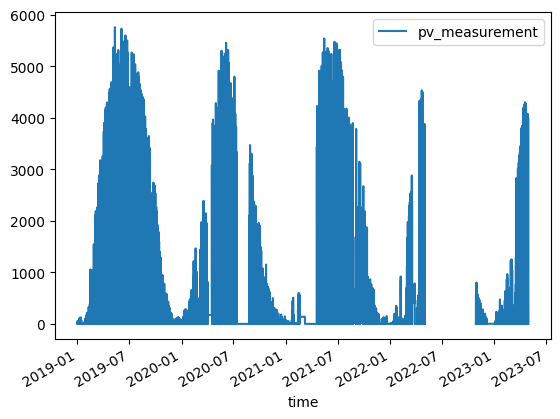

In [201]:
test = y['b'].set_index('time').drop(pd.date_range('2020-07-12','2020-08-26', freq='1h'))

# y['b'].set_index('time').loc['2020-07-12':'2020-08-26'].plot()
test.plot()

<Axes: xlabel='time'>

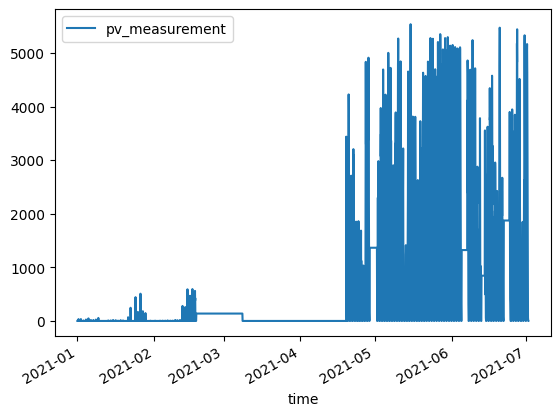

In [202]:
y['b'].set_index('time').loc['2021-01-01':'2021-07-01'].plot()


<Axes: xlabel='time'>

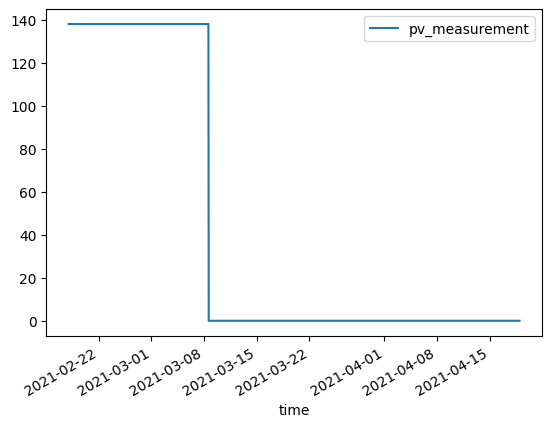

In [203]:

y['b'].set_index('time').loc['2021-02-18':'2021-04-18'].plot()

<Axes: xlabel='time'>

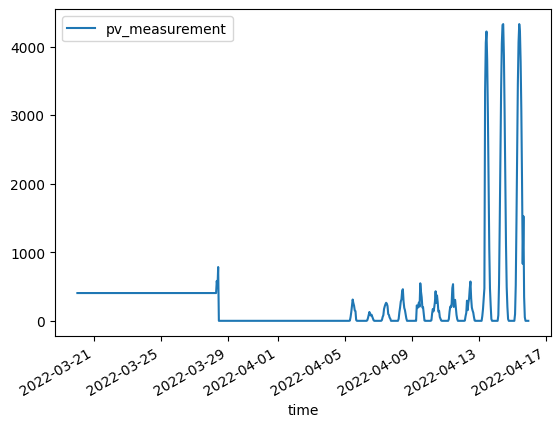

In [204]:
y['b'].set_index('time').loc['2022-03-20':'2022-04-15'].plot()
